In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [9]:
def get_algo_name(filename: str) -> str:
    filename = filename.lower()
    if "merge" in filename:
        return "String-specific merge sort" if "stringmerge" in filename else "Generic merge sort"
    if "quick" in filename:
        return "String-specific quick sort" if "stringquick" in filename else "Generic quick sort"
    if "msd" in filename:
        mode = "without" if "false" in filename else "with"
        return f"MSD Radix Sort {mode}\nswitch to String Quick Sort"
    raise Exception(filename)
    
def get_array_type(filename: str) -> str:
    filename = filename.lower()
    if "almost" in filename:
        return "Almost sorted strings"
    if "reversed" in filename:
        return "Reversed sorted strings"
    if "shuf" in filename:
        return "Shuffled strings"
    raise Exception(filename)

def show_info(*filenames: str):
    array_type = get_array_type(filenames[0])

    ax0 = plt.gca()
    ax0.set_title(f"Array type: {array_type}")
    for filename in filenames:
        if not filename.endswith(".csv"):
            filename += ".csv"
        assert array_type == get_array_type(filename)
        df = pd.read_csv(filename)
        algo_name = get_algo_name(filename)
        df.columns = ["N", algo_name]
        df.plot.line(x="N", y=algo_name, ax=ax0)
    plt.show()

    is_measuring_time = "time" in filenames[0]
    ylabel = "Time (in macroseconds)" if is_measuring_time else "Comparisions count"
    y = "Time" if is_measuring_time else "Comparisons"
    fig = plt.figure(figsize=(18, 5))
    fig.suptitle(f"Array type: {array_type}", fontsize=14, fontweight="demibold")
    gs = fig.add_gridspec(nrows=1,
                        ncols=len(filenames),
                        wspace=0.2,
                        hspace=1)
    max_y_lim = -1
    for i, filename in enumerate(filenames):
        ax = fig.add_subplot(gs[0, i])
        if not filename.endswith(".csv"):
            filename += ".csv"
        pd.read_csv(filename).plot.line(x="N", y=y, ax=ax)
        if i == 0:
            ax.set_ylabel(ylabel)
        else:
            ax.set_yticklabels([])
        ax.set_title(f"{get_algo_name(filename)}")
        max_y_lim = max(max_y_lim, ax.get_ylim()[1])
    max_y_lim *= 1.1
    for ax in fig.axes:
        ax.set_ylim(0, max_y_lim)
    plt.show()


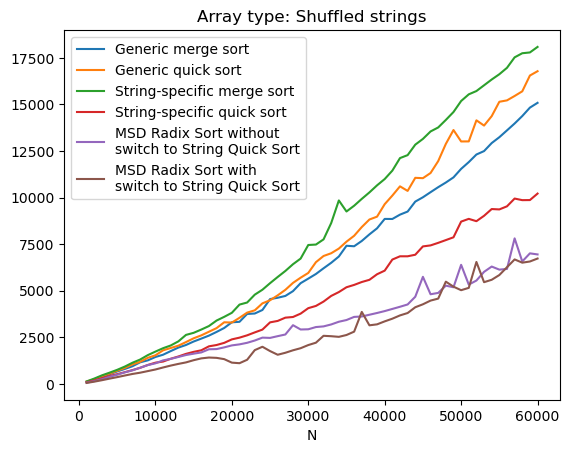

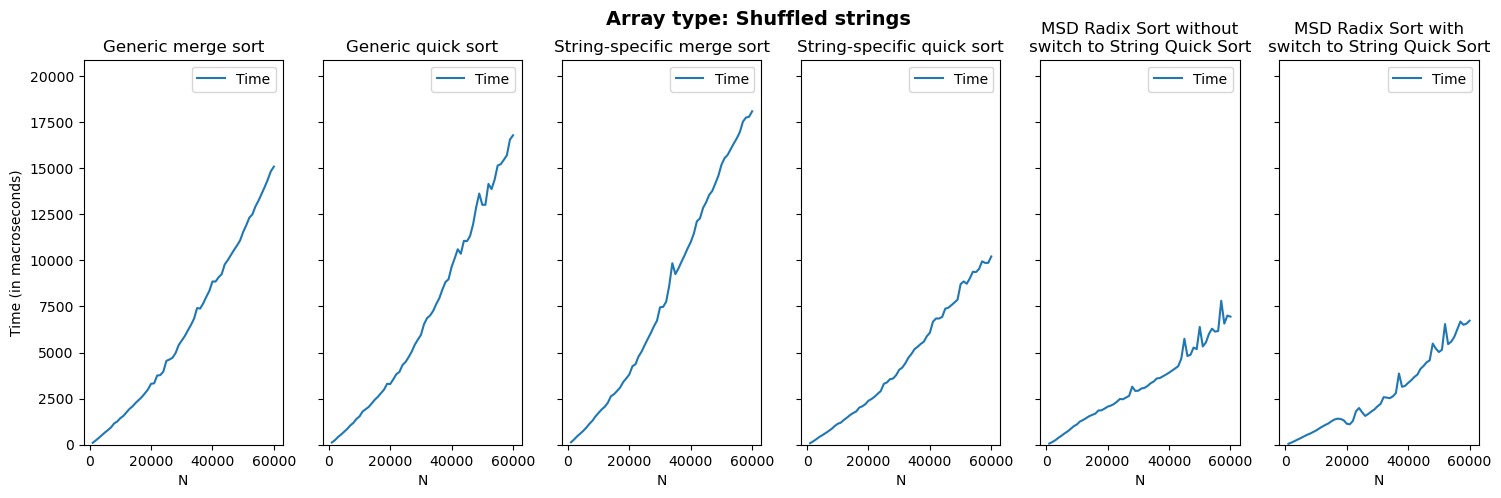

In [3]:
show_info(
    "time_MergeSort_shuffled_strings",
    "time_QuickSort_shuffled_strings",
    "time_StringMergeSort_shuffled_strings",
    "time_StringQuickSort_shuffled_strings",
    "time_MSDRadixSortNiebloid[false]_shuffled_strings",
    "time_MSDRadixSortNiebloid[true]_shuffled_strings",
)

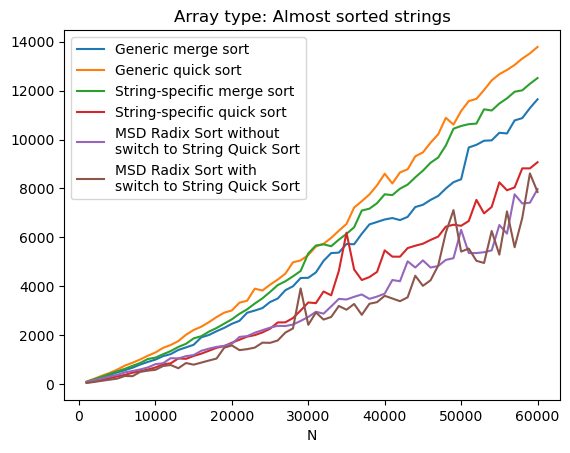

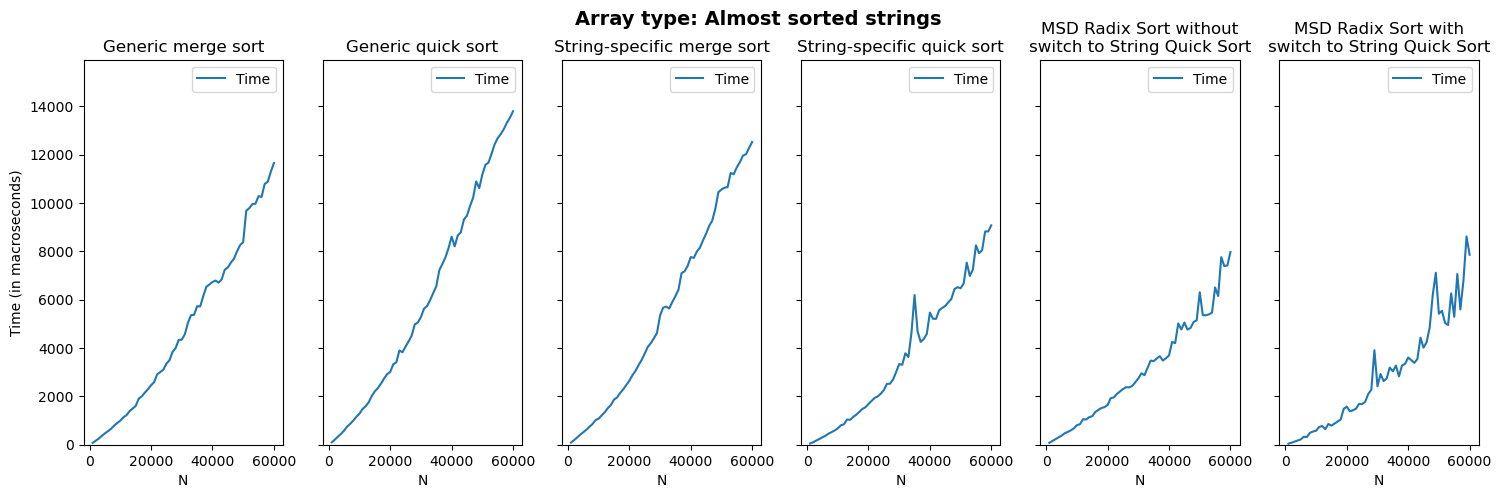

In [4]:
show_info(
    "time_MergeSort_almost_sorted_strings",
    "time_QuickSort_almost_sorted_strings",
    "time_StringMergeSort_almost_sorted_strings",
    "time_StringQuickSort_almost_sorted_strings",
    "time_MSDRadixSortNiebloid[false]_almost_sorted_strings",
    "time_MSDRadixSortNiebloid[true]_almost_sorted_strings",
)

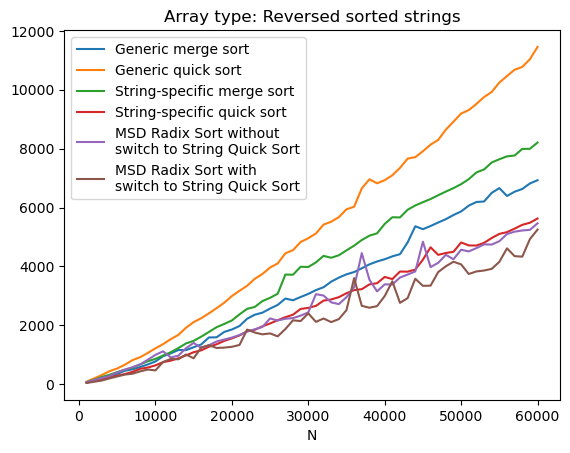

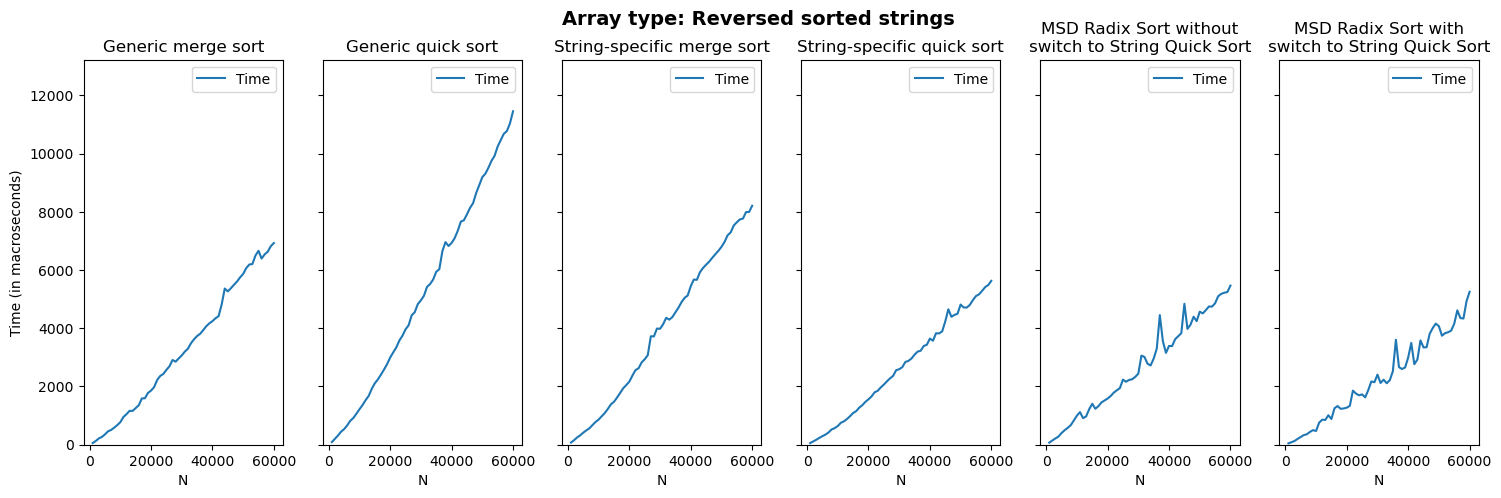

In [5]:
show_info(
    "time_MergeSort_reversed_sorted_strings",
    "time_QuickSort_reversed_sorted_strings",
    "time_StringMergeSort_reversed_sorted_strings",
    "time_StringQuickSort_reversed_sorted_strings",
    "time_MSDRadixSortNiebloid[false]_reversed_sorted_strings",
    "time_MSDRadixSortNiebloid[true]_reversed_sorted_strings",
)

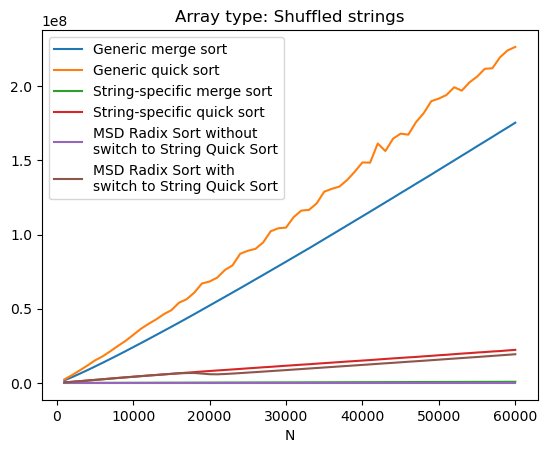

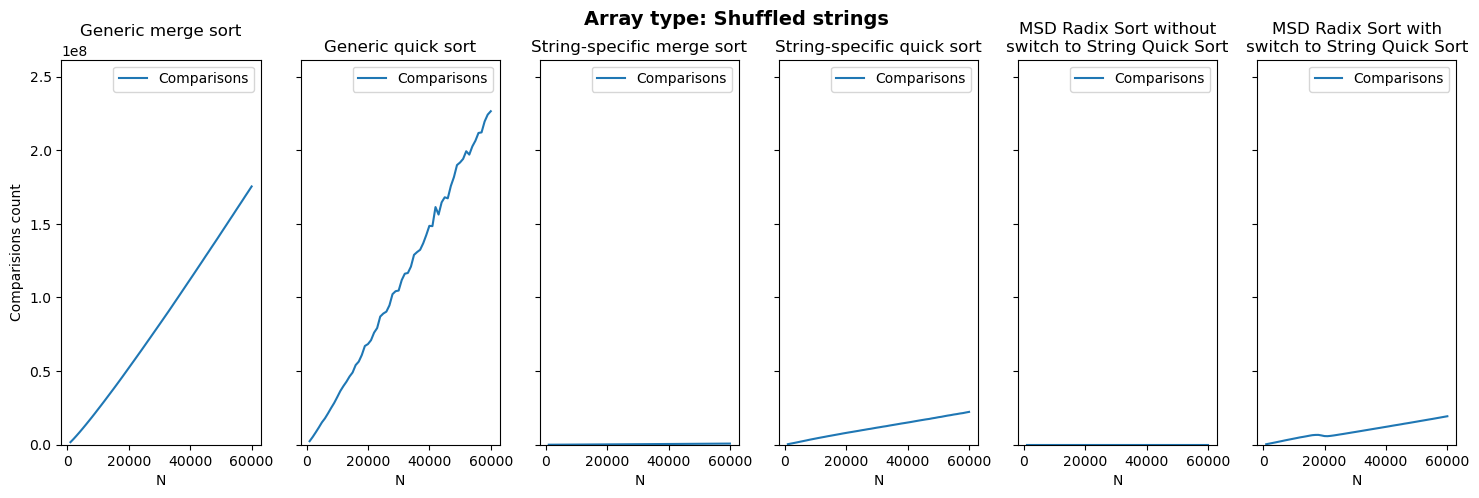

In [10]:
show_info(
    "comp_MergeSort_shuffled_strings",
    "comp_QuickSort_shuffled_strings",
    "comp_StringMergeSort_shuffled_strings",
    "comp_StringQuickSort_shuffled_strings",
    "comp_MSDRadixSortNiebloid[false]_shuffled_strings",
    "comp_MSDRadixSortNiebloid[true]_shuffled_strings",
)

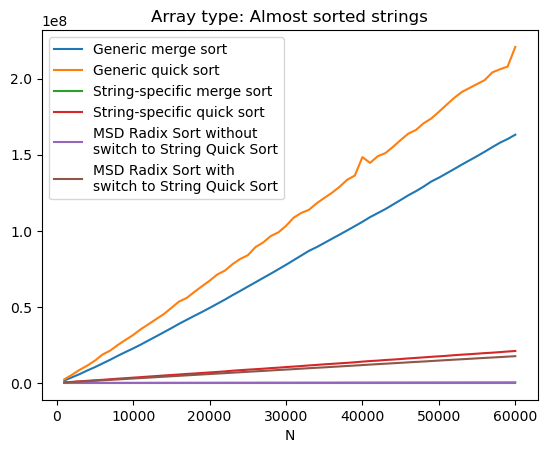

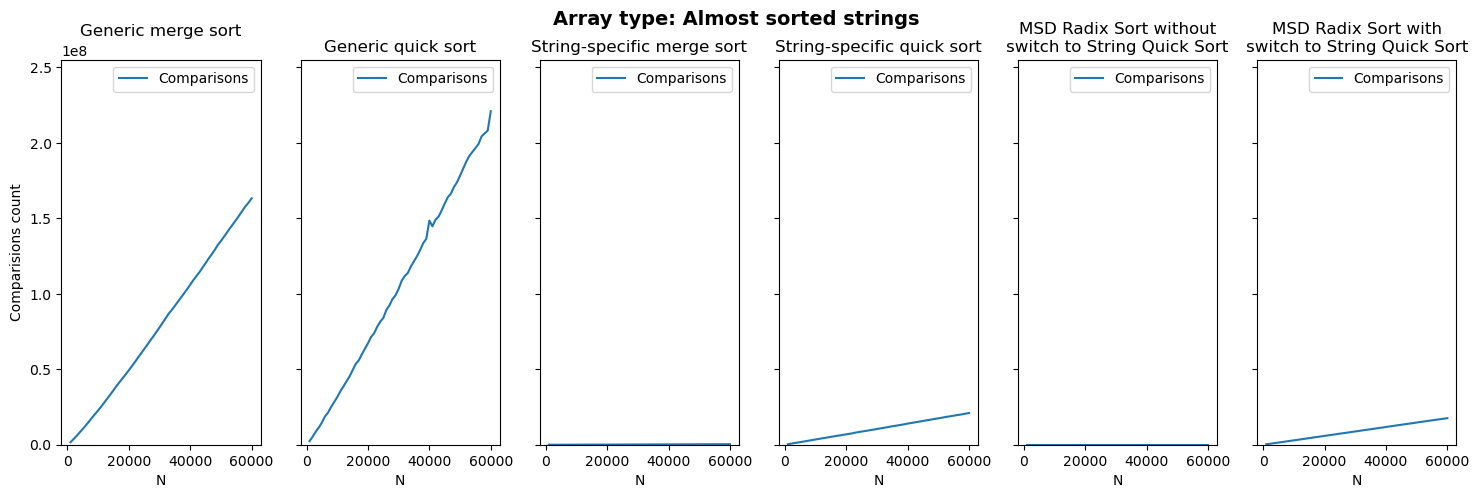

In [11]:
show_info(
    "comp_MergeSort_almost_sorted_strings",
    "comp_QuickSort_almost_sorted_strings",
    "comp_StringMergeSort_almost_sorted_strings",
    "comp_StringQuickSort_almost_sorted_strings",
    "comp_MSDRadixSortNiebloid[false]_almost_sorted_strings",
    "comp_MSDRadixSortNiebloid[true]_almost_sorted_strings",
)

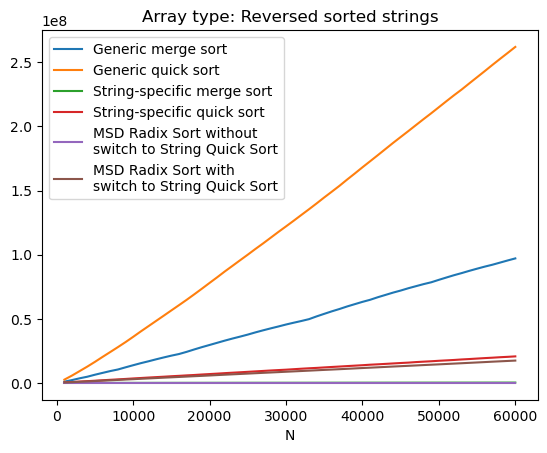

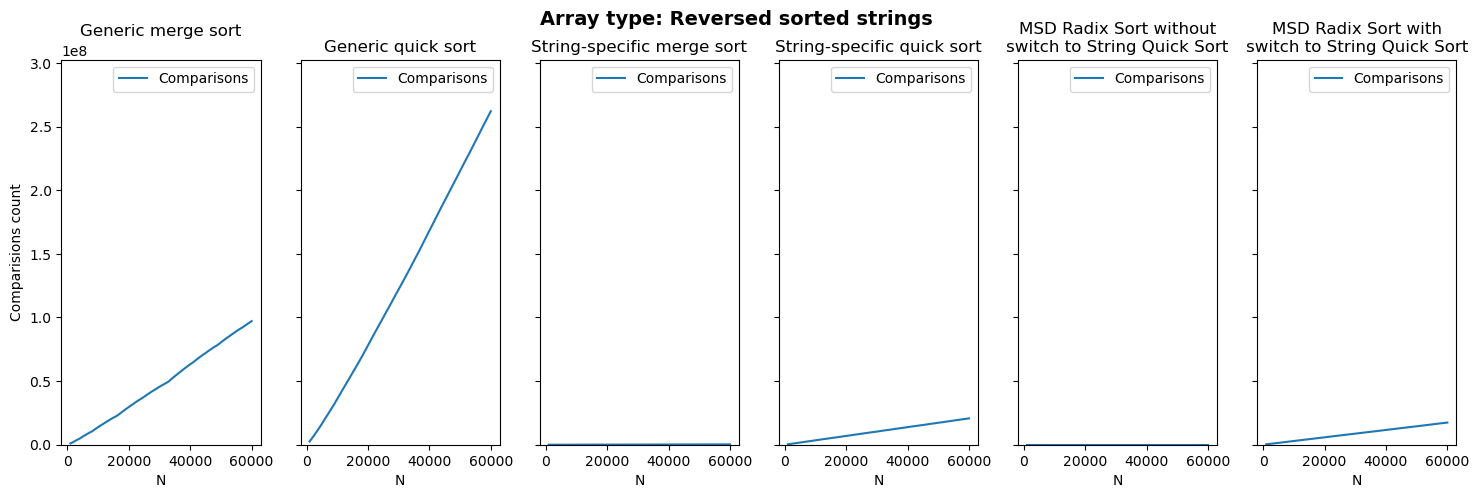

In [12]:
show_info(
    "comp_MergeSort_reversed_sorted_strings",
    "comp_QuickSort_reversed_sorted_strings",
    "comp_StringMergeSort_reversed_sorted_strings",
    "comp_StringQuickSort_reversed_sorted_strings",
    "comp_MSDRadixSortNiebloid[false]_reversed_sorted_strings",
    "comp_MSDRadixSortNiebloid[true]_reversed_sorted_strings",
)

Как видно, merge sort для строк работает немного медленнее, чем стандартный merge sort, quick sort для строк - немного быстрее, чем стандартный quick sort, а msd radix sort - намного быстрее, чем все предыдущие алгоритмы (при этом, факт переключения на string quick sort не влияет существенно на скорость работы)